## 다중 선형 회귀(multiple linear regression)

### Python package 로드 및 matplotlib 출력 옵션 설정

In [18]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

### 데이터 생성

In [51]:
data = pd.read_csv("MLB_2014_2017.csv")

In [52]:
data = data[lambda x: x.Salary > 0]
data = data.reset_index(drop=True)

In [53]:
data.drop(['Name', 'Id', 'Tm', 'Lg'], axis=1, inplace=True)

In [54]:
# 독립변수를 X라는 변수에 저장
X = data.iloc[:, :30]

# 종속변수를 y라는 변수에 저장
y = data['Salary']

### 데이터 학습

In [55]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))

print('a value = ', linear_regression.intercept_) # 1개
print('b value = ', linear_regression.coef_)      # 독립변수 개수만큼 생성

a value =  -10982619.233690117
b value =  [ 1.36274882e+05 -6.55047234e+04  8.88326689e+05 -8.67090215e+05
  6.09615272e+04 -8.98084718e+02 -5.53756730e+04  2.91844230e+04
 -8.02233018e+03  2.38050459e+04  3.31505919e+03 -5.26620343e+04
 -8.82066171e+05  5.18100036e+03 -1.67796135e+07 -1.59147922e+08
 -1.72594585e+08  1.77843098e+08 -7.35489334e+03 -2.19718950e+04
  7.45915469e+04 -9.58883268e+05 -1.00137062e+06 -8.56512489e+05
  8.19168027e+04  4.67854155e+05  2.40100149e+04 -7.35742210e+03
  6.62619326e+05  7.97688563e+04]


### 적합도 검증

In [40]:
# 잔차
residuals = y - prediction
residuals.describe()

count    1.042000e+03
mean     2.953776e-08
std      4.719838e+06
min     -1.645846e+07
25%     -2.498309e+06
50%     -5.940571e+05
75%      1.780610e+06
max      2.540903e+07
Name: Salary, dtype: float64

In [41]:
# 결정계수
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.4882322835165951


### 성능 평가

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.4882322835165951
Mean_Squared_Error =  22255487538669.773
RMSE =  4717572.208103419


### 종속변수에 대한 상관관계

In [31]:
X.corrwith(y)

Age        0.407272
G          0.294972
PA         0.380130
AB         0.362154
R          0.383428
H          0.366494
2B         0.319225
3B        -0.025306
HR         0.387438
RBI        0.438336
SB         0.000223
CS        -0.022913
BB         0.418100
SO         0.243177
BA         0.210772
OBP        0.296512
SLG        0.292201
OPS        0.314051
OPS+       0.312387
TB         0.398797
GDP        0.385462
HBP        0.132438
SH        -0.213979
SF         0.309811
IBB        0.344611
Career     0.523189
Weight     0.228381
Height     0.132884
AllStar    0.571684
Awards     0.506528
dtype: float64

### Heatmap

In [44]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 15]

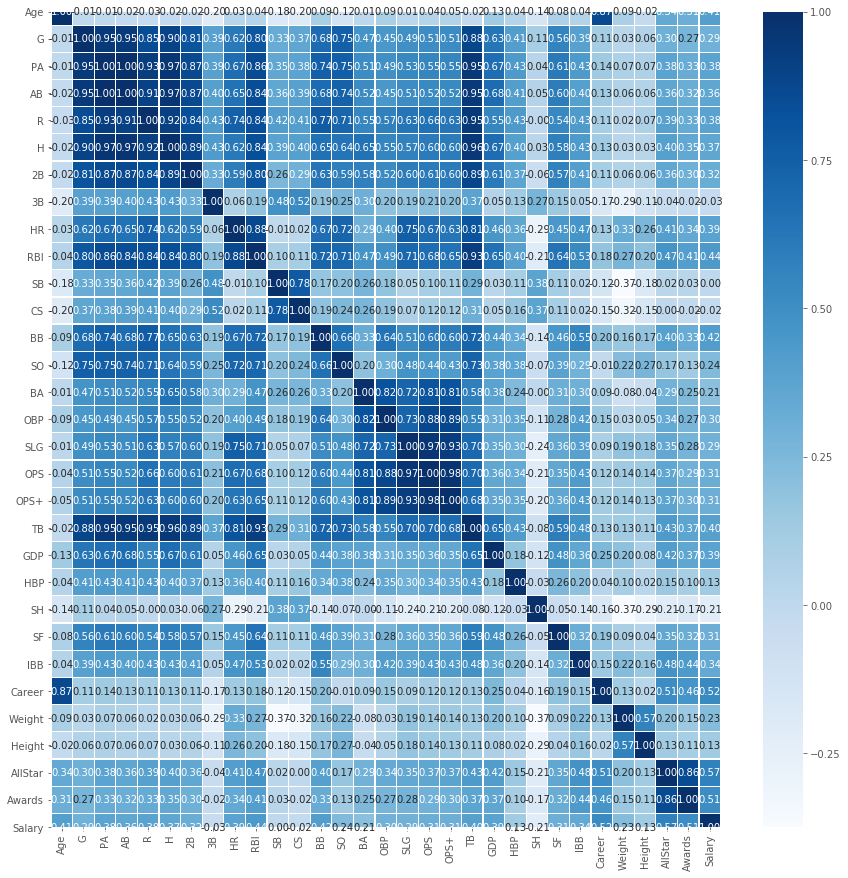

In [46]:
sns.heatmap(data = data.corr(), annot = True,
           fmt = '.2f', linewidths = .2, cmap = 'Blues')